## Polynomial regression model

Polynomial regression model is technically a special case of multiple linear regression. This is definitions and explanation found in Wikipedia: https://en.wikipedia.org/wiki/Polynomial_regression.
Just quote the explanations found there to introduce you to the topic of polynomial regression.
Can be used in any linear equation for both linear regression and linear classification.

Polynomial regression model can be used in any linear equation for both linear regression and linear classification.

The goal of regression analysis is to model the expected value of a dependent variable y in terms of the value of an independent variable (or vector of independent variables) x. In simple linear regression, the model is used, where ε is an unobserved random error with mean zero conditioned on a scalar variable x. In this model, for each unit increase in the value of x, the conditional expectation of y increases by β1 units.

 # ${\displaystyle y=\beta _{0}+\beta _{1}x+\varepsilon ,\,}$

In many settings, such a linear relationship may not hold. For example, if we are modeling the yield of a chemical synthesis in terms of the temperature at which the synthesis takes place, we may find that the yield improves by increasing amounts for each unit increase in temperature. In this case, we might propose a quadratic model of the form

# $ {\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\varepsilon .\,}$

In general, we can model the expected value of y as an nth degree polynomial, yielding the general polynomial regression model:

# $ {\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}$

Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters β0, β1, .... Therefore, for least squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating x, x2, ... as being distinct independent variables in a multiple regression model.

Although polynomial regression is technically a special case of multiple linear regression, the interpretation of a fitted polynomial regression model requires a somewhat different perspective. It is often difficult to interpret the individual coefficients in a polynomial regression fit, since the underlying monomials can be highly correlated. For example, x and x2 have correlation around 0.97 when x is uniformly distributed on the interval (0, 1). Although the correlation can be reduced by using orthogonal polynomials, it is generally more informative to consider the fitted regression function as a whole.

Source: https://en.wikipedia.org/wiki/Polynomial_regression

Simply put, there are phenomena that are seasonal, winding in time. Such phenomena can be described by means of a linear function but the regression equation will be inefficient, the model will be imprecise.
Normal linear regression equation:

# ${\displaystyle y=\beta _{0}+\beta _{1}x+\varepsilon ,\,}$

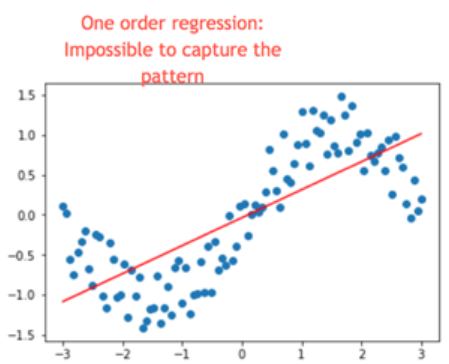

The use of a quadratic variable in a regression equation can greatly improve model properties:

# $ {\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\varepsilon .\,}$

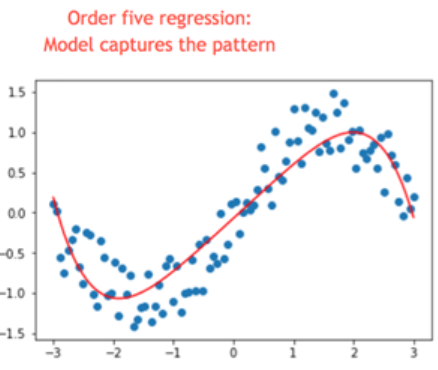

Source of plots: https://www.guru99.com/linear-classifier-tensorflow.html 

# Polynomial regression model in practice

http://sigmaquality.pl/python/linear-regression-2/

Recently, I published a situation on my blog where I had to predict CO air pollution. The describing variables were temperature and humidity. Despite the use of shift, it was not possible to build an effective model (r square was 0.15).

I saved the data from that study:

In [10]:
import pandas as pd

df = pd.read_csv('c:/TF/AirQ_shift.csv')
df.head(3)

,Unnamed: 0,DATE,CO(GT),Shift_RH,Shift_T,Shift_weather_time
0,36,2004-03-10 18:00:00,2.6,58.1,10.5,2004-03-11 06:00:00
1,37,2004-03-10 19:00:00,2.0,59.6,10.2,2004-03-11 07:00:00
2,38,2004-03-10 20:00:00,2.2,57.4,10.8,2004-03-11 08:00:00


## Linear regression model: ${\displaystyle y=\beta _{0}+\beta _{1}x+\varepsilon\,}$


Declares X, y variables into the model.

In [13]:
X = df[['Shift_RH', 'Shift_T']].values
y = df['CO(GT)'].values

I divide the collection into training variables and test variables.

In [14]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

I am building a regression model.

In [15]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
import numpy as np

y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred, decimals=2)

In [19]:
from sklearn import metrics

print('Mean Squared Error:     ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:      0.15437562015505324


## Polynomial regression model:  $ {\displaystyle y=\beta _{0}+\beta _{1}x+\beta _{2}x^{2}+\beta _{3}z+\beta _{4}z^{2}+\varepsilon \,}$

To build a polynomial regression model, you need to square independent variables: temperature and absolute humidity.
These variables squared will be treated as separate variables in the model.

So I create two new variables.

In [27]:
df['Shift_RH^2']=df['Shift_RH']**2
df['Shift_T^2']=df['Shift_T']**2

In [28]:
df.head(3)

,Unnamed: 0,DATE,CO(GT),Shift_RH,Shift_T,Shift_weather_time,Shift_RH^2,Shift_T^2
0,36,2004-03-10 18:00:00,2.6,58.1,10.5,2004-03-11 06:00:00,3375.61,110.25
1,37,2004-03-10 19:00:00,2.0,59.6,10.2,2004-03-11 07:00:00,3552.16,104.04
2,38,2004-03-10 20:00:00,2.2,57.4,10.8,2004-03-11 08:00:00,3294.76,116.64


### We create polynomial model

Declares new X, y variables into the model.

In [31]:
X = df[['Shift_RH', 'Shift_T', 'Shift_RH^2', 'Shift_T^2']].values
y = df['CO(GT)'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred, decimals=2)

In [34]:
print('Mean Squared Error:     ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:      0.15892318270410333


The change is unnoticed, econometric tools do not always improve the model significantly. What counts above all is the ability to apply the technique.